<IPython.core.display.Javascript object>


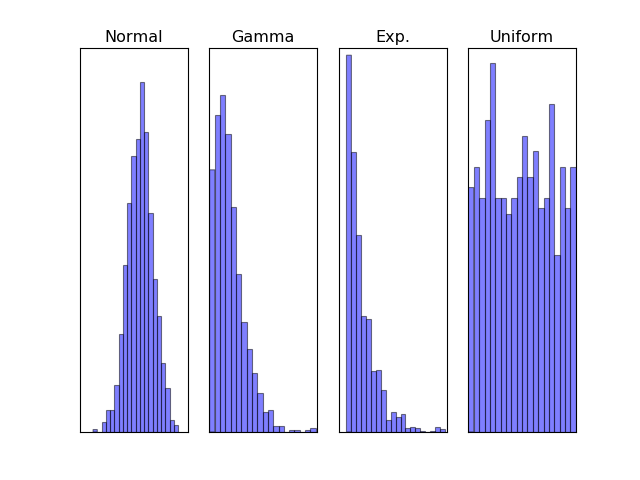

In [6]:
"""
Applied Plotting, Charting & Data Representation in Python
Assignmnet 3
Practice Assignment: Understanding Distributions Through Sampling
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib notebook

# Global constants to be reused in the modeule
RAMDOM_SEED = 12345
np.random.seed(RAMDOM_SEED) # set random state for reproducibility
RANDOM_VAR_SIZE = int(1e4) # fix random variable size 

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, RANDOM_VAR_SIZE)
x2 = np.random.gamma(2, 1.5, RANDOM_VAR_SIZE)
x3 = np.random.exponential(2, RANDOM_VAR_SIZE)+7
x4 = np.random.uniform(14,20, RANDOM_VAR_SIZE)

# Setup figure and axes for animation
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
ax = (ax1, ax2, ax3, ax4)

def pull_random(sample_size=100):
    """
    Pulling between 100 and 1000 random samples from each of random variables (x1 -- x4).

    Parameters
    ----------
    sample_size : int, optional
        Random sample size, pulled from each varables, default 100. 
        Values are trimmed to be in 100-1000 range.

    Returns
    -------
    touple of np arrays with randomly sampled observations from each variable
    """
    sample_size = min(max(100,sample_size), 1000)

    # create random variable to sample data from variables
    random_idx = np.random.randint(0, RANDOM_VAR_SIZE, sample_size)

    return (x1[random_idx], x2[random_idx], x3[random_idx], x4[random_idx])

def draw_samples(sample_size):
    """
    Function for drawing plots of random samples from x1 -- x4 random variables.
    This function will be used as argument for the FuncAnimation function.

    Parameters
    ----------
    sample_size : int
        Sample size to be drawn from each random variable.
    """
    
    # Remove ticks and clear axes for each frame - otherwise plots overlaps
    for a in ax:
        a.get_xaxis().set_visible(False)
        a.get_yaxis().set_visible(False)
        a.clear()

    # Get samples to be redrawn
    x = pull_random(sample_size)
    
    # plot the histograms on each axes
    ax1.hist(x[0], normed=True, bins=20, alpha=0.5)
    ax1.set_title('Normal')

    ax2.hist(x[1], normed=True, bins=20, alpha=0.5)
    ax2.set_title('Gamma')

    ax3.hist(x[2], normed=True, bins=20, alpha=0.5)
    ax3.set_title('Exponential')

    ax4.hist(x[3], normed=True, bins=20, alpha=0.5);
    ax4.set_title('Uniform')

frames = range(100, 1000, 10) # parameters for animation
a = animation.FuncAnimation(fig, draw_samples, frames=frames, interval=200, repeat=False)
